# rosita test

In [1]:
# %matplotlib qt

In [2]:
from maelzel.snd import audiosample
from maelzel.snd import rosita
import matplotlib.pyplot as plt
import csoundengine as ce
import numpy as np

plt.rcParams["figure.figsize"] = (21,8)

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


In [3]:
e = ce.Engine()
session = e.session()




--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [4]:
audiosample.setPlayEngine(e)

In [5]:
s = audiosample.Sample("/home/em/daw/onset-detection-test/onset-detection-test.flac")
s.preparePlay()
samples = s.samples[:,0]
samples

array([0., 0., 0., ..., 0., 0., 0.])

Sample(dur=26.428049886621316, sr=44100, ch=2)
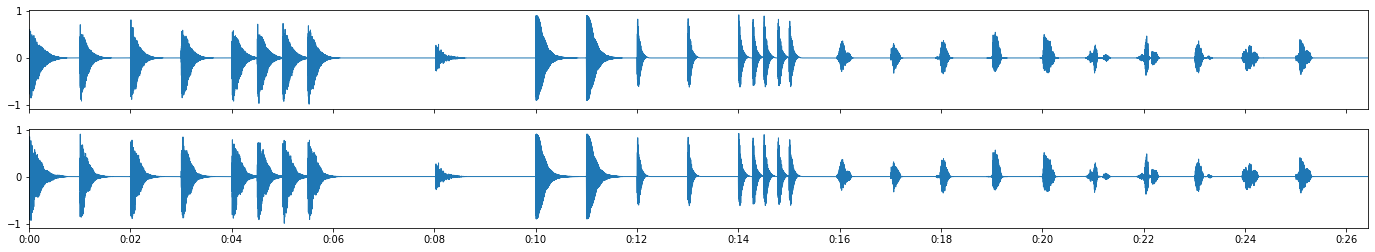

In [5]:
s

In [6]:
s.play()

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playSample:1001.0002, p4=0 isndtab:5=104 iloop:6=0 istart:7=0 ifade:8=0.05 igaingroup:9=0 icompensatesr:10=1 kchan:11=1 kspeed:12=1 kgain:13=1 kpan:14=-1)

In [6]:
hop = 512
env = rosita.onset_strength(y=samples, sr=s.sr, hop_length=hop)
envtimes = rosita.times_like(env, sr=s.sr, hop_length=hop)
onsets = rosita.onset_detect(s.samples[:,0], s.sr, onset_envelope=env, hop_length=hop, units='time', delta=0.07, mingap=0.15)

plt.plot(envtimes, env, alpha=0.8)
plt.plot(np.arange(0, s.duration, 1/s.sr), s.samples[:,0]**2*20, alpha=0.4, linewidth=1)
for onset in onsets:
    plt.axvline(x=onset, alpha=0.3, linewidth=1)

In [7]:
session.defInstr('click', r'''
a0 = oscili(0.5, 1000)
aenv = expseg:a(0.00001, 0.005, 1, 0.1, 0.0001)
a0 *= aenv
outch 1, a0
''')

Instr(click)

In [8]:
latency = 0.2
with e.lockedClock():
    synths = [session.sched('click', delay=onset+latency, dur=0.05)
              for onset in onsets]
    synths.append(s.play(gain=0.1, delay=latency))
    group = ce.synth.SynthGroup(synths)
group

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=32)
    Synth(𝍪 click:1001.0002, p4=0)
    Synth(𝍪 click:1001.0003, p4=0)
    Synth(𝍪 click:1001.0004, p4=0)
    Synth(𝍪 click:1001.0005, p4=0)
    Synth(𝍪 click:1001.0006, p4=0)
    Synth(𝍪 click:1001.0007, p4=0)
    Synth(𝍪 click:1001.0008, p4=0)
    Synth(𝍪 click:1001.0009, p4=0)
    Synth(𝍪 click:1001.001, p4=0)
    Synth(𝍪 click:1001.0011, p4=0)
    Synth(𝍪 click:1001.0012, p4=0)
    Synth(𝍪 click:1001.0013, p4=0)
    Synth(𝍪 click:1001.0014, p4=0)
    Synth(𝍪 click:1001.0015, p4=0)
    Synth(𝍪 click:1001.0016, p4=0)
    Synth(𝍪 click:1001.0017, p4=0)
    Synth(𝍪 click:1001.0018, p4=0)
    Synth(𝍪 click:1001.0019, p4=0)
    Synth(𝍪 click:1001.002, p4=0)
    Synth(𝍪 click:1001.0021, p4=0)
    Synth(𝍪 click:1001.0022, p4=0)
    Synth(𝍪 click:1001.0023, p4=0)
    Synth(𝍪 click:1001.0024, p4=0)
    Synth(𝍪 click:1001.0025, p4=0)
    Synth(𝍪 click:1001.0026, p4=0)
    Synth(𝍪 click:1001.0027, p4=0)
    Synth(𝍪 click:1001.0028, p4=0)
    Synth(𝍪 click:1001.0029, p4=0)
    Synth(𝍪 click:1001.003, p4=0)
    Synth(𝍪 click:1001.0031, p4=0)
    Synth(𝍪 click:1001.0032, p4=0)
    Synth(𝍪 .playSample:1002.0002, p4=0 isndtab:5=104 iloop:6=0 istart:7=0 ifade:8=0.05 igaingroup:9=0 icompensatesr:10=1 kchan:11=1 kspeed:12=1 kgain:13=0.1 kpan:14=-1)

In [9]:
session.unschedAll()